Author(s): Piyush Amitabh

Details: This code reads tiff z-stacks, finds the mip and saves them
(written for the time-lapse images)

Created: May 12, 2022

License: GNU GPL v3.0

Last edited: May 12, 2022

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import multiprocessing
import tifffile as tiff 
import skimage
# import skimage.io
# import skimage.exposure
# import skimage.morphology
# import skimage.measure
# import skimage.transform
# import skimage.segmentation
from PIL import Image, TiffTags
from natsort import natsorted
import plotly.express as px

# CONV Time lapse

In [3]:
main_dir = ['/home/piyush/Downloads/DATA/time lapse/']

In [4]:
sub_dir = ['GFP', 'RFP']
save_add = ['gfp_mip', 'rfp_mip']

check single image

In [14]:
for i, sub in enumerate(sub_dir):
    dir_path = main_dir[0] + sub + '/'
    #read and sort all filenames
    listfiles = []
    for img_files in natsorted(os.listdir(dir_path)): 
        if img_files.endswith(".tif"):
            listfiles.append(img_files)
    break

In [15]:
listfiles

['Timepoint1_Pos1_ds_gfp.tif',
 'Timepoint1_Pos2_ds_gfp.tif',
 'Timepoint1_Pos3_ds_gfp.tif',
 'Timepoint1_Pos4_ds_gfp.tif',
 'Timepoint1_Pos5_ds_gfp.tif',
 'Timepoint1_Pos6_ds_gfp.tif',
 'Timepoint1_Pos7_ds_gfp.tif',
 'Timepoint1_Pos8_ds_gfp.tif',
 'Timepoint2_Pos1_ds_gfp.tif',
 'Timepoint2_Pos2_ds_gfp.tif',
 'Timepoint2_Pos3_ds_gfp.tif',
 'Timepoint2_Pos4_ds_gfp.tif',
 'Timepoint2_Pos5_ds_gfp.tif',
 'Timepoint2_Pos6_ds_gfp.tif',
 'Timepoint2_Pos7_ds_gfp.tif',
 'Timepoint2_Pos8_ds_gfp.tif',
 'Timepoint3_Pos1_ds_gfp.tif',
 'Timepoint3_Pos2_ds_gfp.tif',
 'Timepoint3_Pos3_ds_gfp.tif',
 'Timepoint3_Pos4_ds_gfp.tif',
 'Timepoint3_Pos5_ds_gfp.tif',
 'Timepoint3_Pos6_ds_gfp.tif',
 'Timepoint3_Pos7_ds_gfp.tif',
 'Timepoint3_Pos8_ds_gfp.tif',
 'Timepoint4_Pos1_ds_gfp.tif',
 'Timepoint4_Pos2_ds_gfp.tif',
 'Timepoint4_Pos3_ds_gfp.tif',
 'Timepoint4_Pos4_ds_gfp.tif',
 'Timepoint4_Pos5_ds_gfp.tif',
 'Timepoint4_Pos6_ds_gfp.tif',
 'Timepoint4_Pos7_ds_gfp.tif',
 'Timepoint4_Pos8_ds_gfp.tif',
 'Timepo

In [18]:
img_files

'gfp_mip'

In [16]:
#read entire stack for a location
for img_i, img_val in enumerate(listfiles):
    stack_full = tiff.imread(dir_path+img_val)
    break

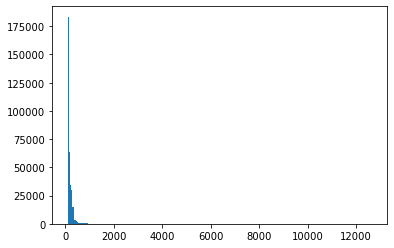

In [24]:
plt.hist(stack_full[94, :, :].ravel(), bins=256);

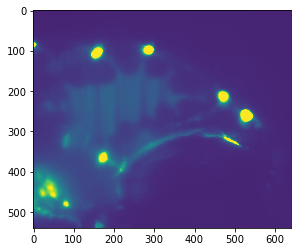

In [29]:
plt.imshow(stack_full[94, :, :], clim=(0, 1000))

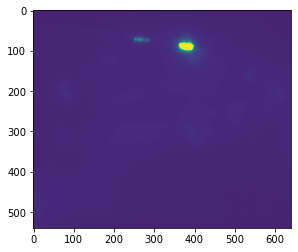

In [30]:
plt.imshow(stack_full[207, :, :], clim=(0, 1000))

## MIP of GFP and RFP zstacks

In [11]:
for i, sub in enumerate(sub_dir):
    dir_path = main_dir[0] + sub + '/'
    #read and sort all filenames
    listfiles = []
    for img_files in natsorted(os.listdir(dir_path)): 
        if img_files.endswith(".tif"):
            listfiles.append(img_files)
    #read entire stack for a location
    for img_i, img_val in enumerate(listfiles):
        stack_full = tiff.imread(dir_path+img_val)
        #generate max intensity zproject from stack_full
        IM_MAX_full = np.max(stack_full, axis=0)
    #             plt.imshow(IM_MAX_full)
        #save all the images in designated folder
        save_dir = dir_path+'/'+save_add[i]+'/'
        os.chdir(save_dir)
        IM_MAX_full_img = Image.fromarray(IM_MAX_full)
        IM_MAX_full_img.save(img_val[:-4]+'_mip.tif')

In [9]:
#code for reading separate tiff files constituting a z-stack, contained in a folder
# for i in range(len(date_dir)):
#     for j in range(len(fish_dir)):
#         for k in range(len(pos_dir)):
#             dir_path = main_dir[0]+date_dir[i]+'/'+fish_dir[j]+'/'+append1_dir+pos_dir[k]+'/'+append2_dir
#             #read and sort all filenames
#             listfiles = []
#             for img_files in sorted(os.listdir(dir_path)): 
#                 if img_files.endswith(".tif"):
#                     listfiles.append(img_files)
#             #read entire stack for a location
#             first_image = tiff.imread(dir_path+listfiles[0])
#             stack_full = np.zeros((len(listfiles),first_image.shape[0],first_image.shape[1]),np.uint16)
#             for img_i, img_val in enumerate(listfiles):
#                 stack_full[img_i,:,:]= tiff.imread(dir_path+img_val)
#             #generate max intensity zproject from stack_full
#             IM_MAX_full = np.max(stack_full, axis=0)
# #             plt.imshow(IM_MAX_full)
#             #save all the images in designated folder
#             os.chdir(main_dir[0])
#             IM_MAX_full_img = Image.fromarray(IM_MAX_full)
#             IM_MAX_full_img.save(date_dir[i]+'_'+fish_dir[j]+'_'+pos_dir[k]+'_GFP'+'.tif')